In [12]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

        
def time_series_plot(df):
    """Given dataframe, generate times series plot of numeric data by daily, monthly and yearly frequency"""
    print("\nTo check time series of numeric data  by daily, monthly and yearly frequency")
    if len(df.select_dtypes(include='datetime64').columns)>0:
        for col in df.select_dtypes(include='datetime64').columns:
            for p in ['D', 'M', 'Y']:
                if p=='D':
                    print("Plotting daily data")
                elif p=='M':
                    print("Plotting monthly data")
                else:
                    print("Plotting yearly data")
                for col_num in df.select_dtypes(include=np.number).columns:
                    __ = df.copy()
                    __ = __.set_index(col)
                    __T = __.resample(p).sum()
                    ax = __T[[col_num]].plot()
                    ax.set_ylim(bottom=0)
                    ax.get_yaxis().set_major_formatter(
                    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                    plt.show()

                    
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()


def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
    
    
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()

def profiling_report(df):
    !pip install pandas-profiling
    from pandas_profiling import ProfileReport
    return ProfileReport(df)
    

def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if df.isnull().any(axis=None):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

    # EDA of categorical data
    categorical_eda(df)
    
    # EDA of numeric data
    numeric_eda(df)
        
    # Plot time series plot of numeric data
    time_series_plot(df)

    #helps to make a full report
    profiling_report(df)


In [2]:
df = pd.read_csv(r'C:\Users\mohit\OneDrive\Desktop\omdena-pakistan-covid-analysis\Data\Pakistan_unemployment_data.csv')

In [3]:
df.head()

,Year,Unemployment rate,Country Name,Country Code,Indicator Name,Indicator Code
0,1991,0.59,Pakistan,PAK,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS
1,1992,0.60,Pakistan,PAK,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS
2,1993,0.62,Pakistan,PAK,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS
3,1994,0.63,Pakistan,PAK,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS
4,1995,0.63,Pakistan,PAK,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS


In [6]:
col = df.columns
col = col[2:]
col

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], dtype='object')

In [7]:
for i in range(len(col)):
    df.drop([col[i]] , axis=1 ,inplace=True)

In [8]:
df.head()

,Year,Unemployment rate
0,1991,0.59
1,1992,0.60
2,1993,0.62
3,1994,0.63
4,1995,0.63



To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
Year,30.0,2005.500000,8.803408,1991.0,1998.2500,2005.50,2012.7500,2020.00
Unemployment rate,30.0,1.441667,1.403825,0.4,0.6225,0.63,1.7975,4.65


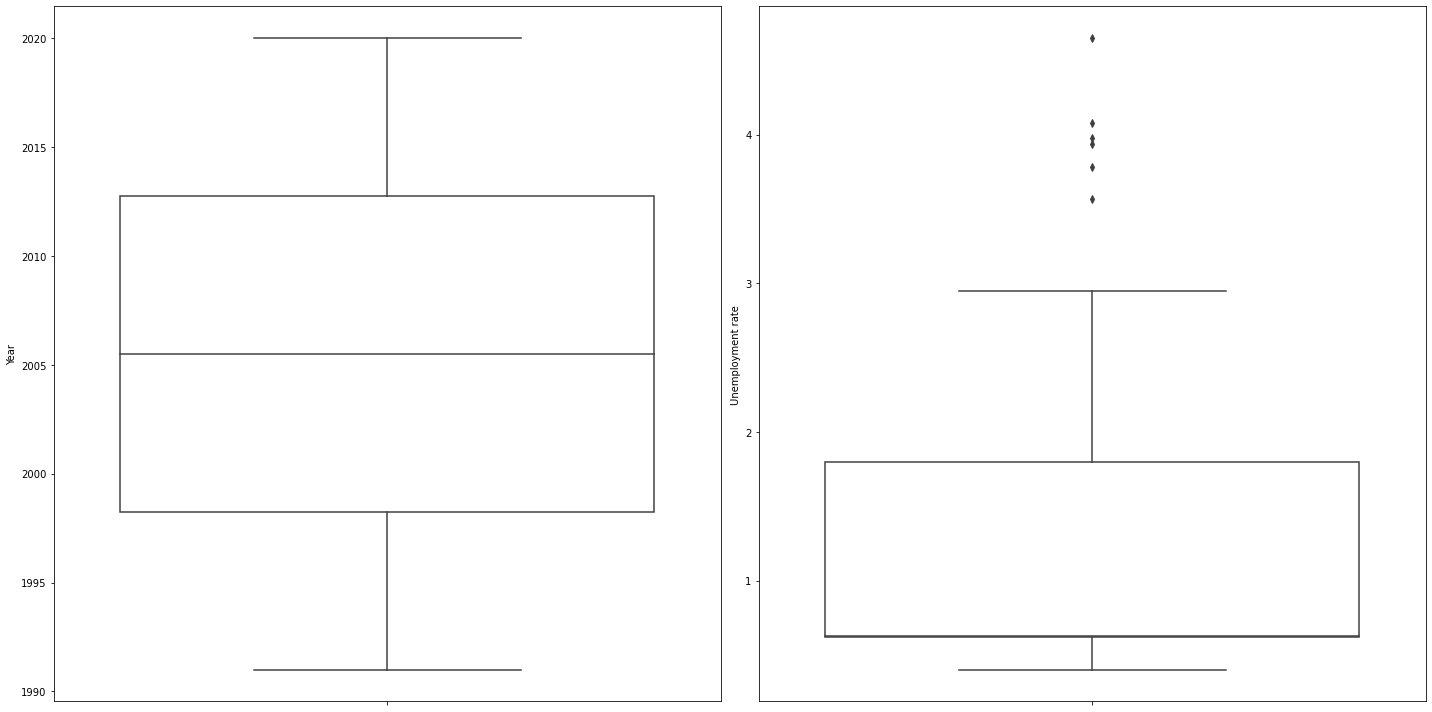


To check pairwise joint distribution of numeric data


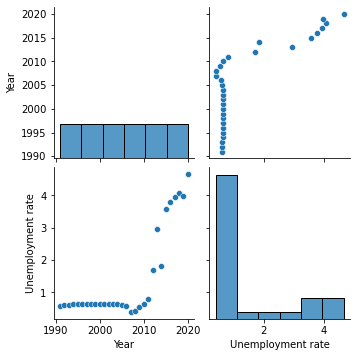

In [9]:
numeric_eda(df)

In [13]:
report = profiling_report(df)

You should consider upgrading via the 'C:\Users\mohit\anaconda3\python.exe -m pip install --upgrade pip' command.


In [14]:
report.to_file('Pakistan_Unemployment_Rate.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 146.47it/s]
